In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('first inten project.csv', parse_dates=['date of reservation'])
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [4]:
# delet unessary col
df.drop(columns=['Booking_ID','P-C','P-not-C'],inplace=True)

In [5]:
# convert date col to date time 
df['date of reservation'] = pd.to_datetime(df['date of reservation'],errors='coerce')

In [6]:
# Ensure column names have no extra spaces
df.columns = df.columns.str.strip()

In [7]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,88.00,0,2015-10-02,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,2018-11-06,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,50.00,0,2018-02-28,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,1,2017-05-20,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,77.00,0,2018-04-11,Canceled


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          36285 non-null  int64         
 1   number of children        36285 non-null  int64         
 2   number of weekend nights  36285 non-null  int64         
 3   number of week nights     36285 non-null  int64         
 4   type of meal              36285 non-null  object        
 5   car parking space         36285 non-null  int64         
 6   room type                 36285 non-null  object        
 7   lead time                 36285 non-null  int64         
 8   market segment type       36285 non-null  object        
 9   repeated                  36285 non-null  int64         
 10  average price             36285 non-null  float64       
 11  special requests          36285 non-null  int64         
 12  date of reservatio

In [9]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [10]:
num_cols

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'average price', 'special requests'],
      dtype='object')

In [11]:
cat_cols

Index(['type of meal', 'room type', 'market segment type', 'booking status'], dtype='object')

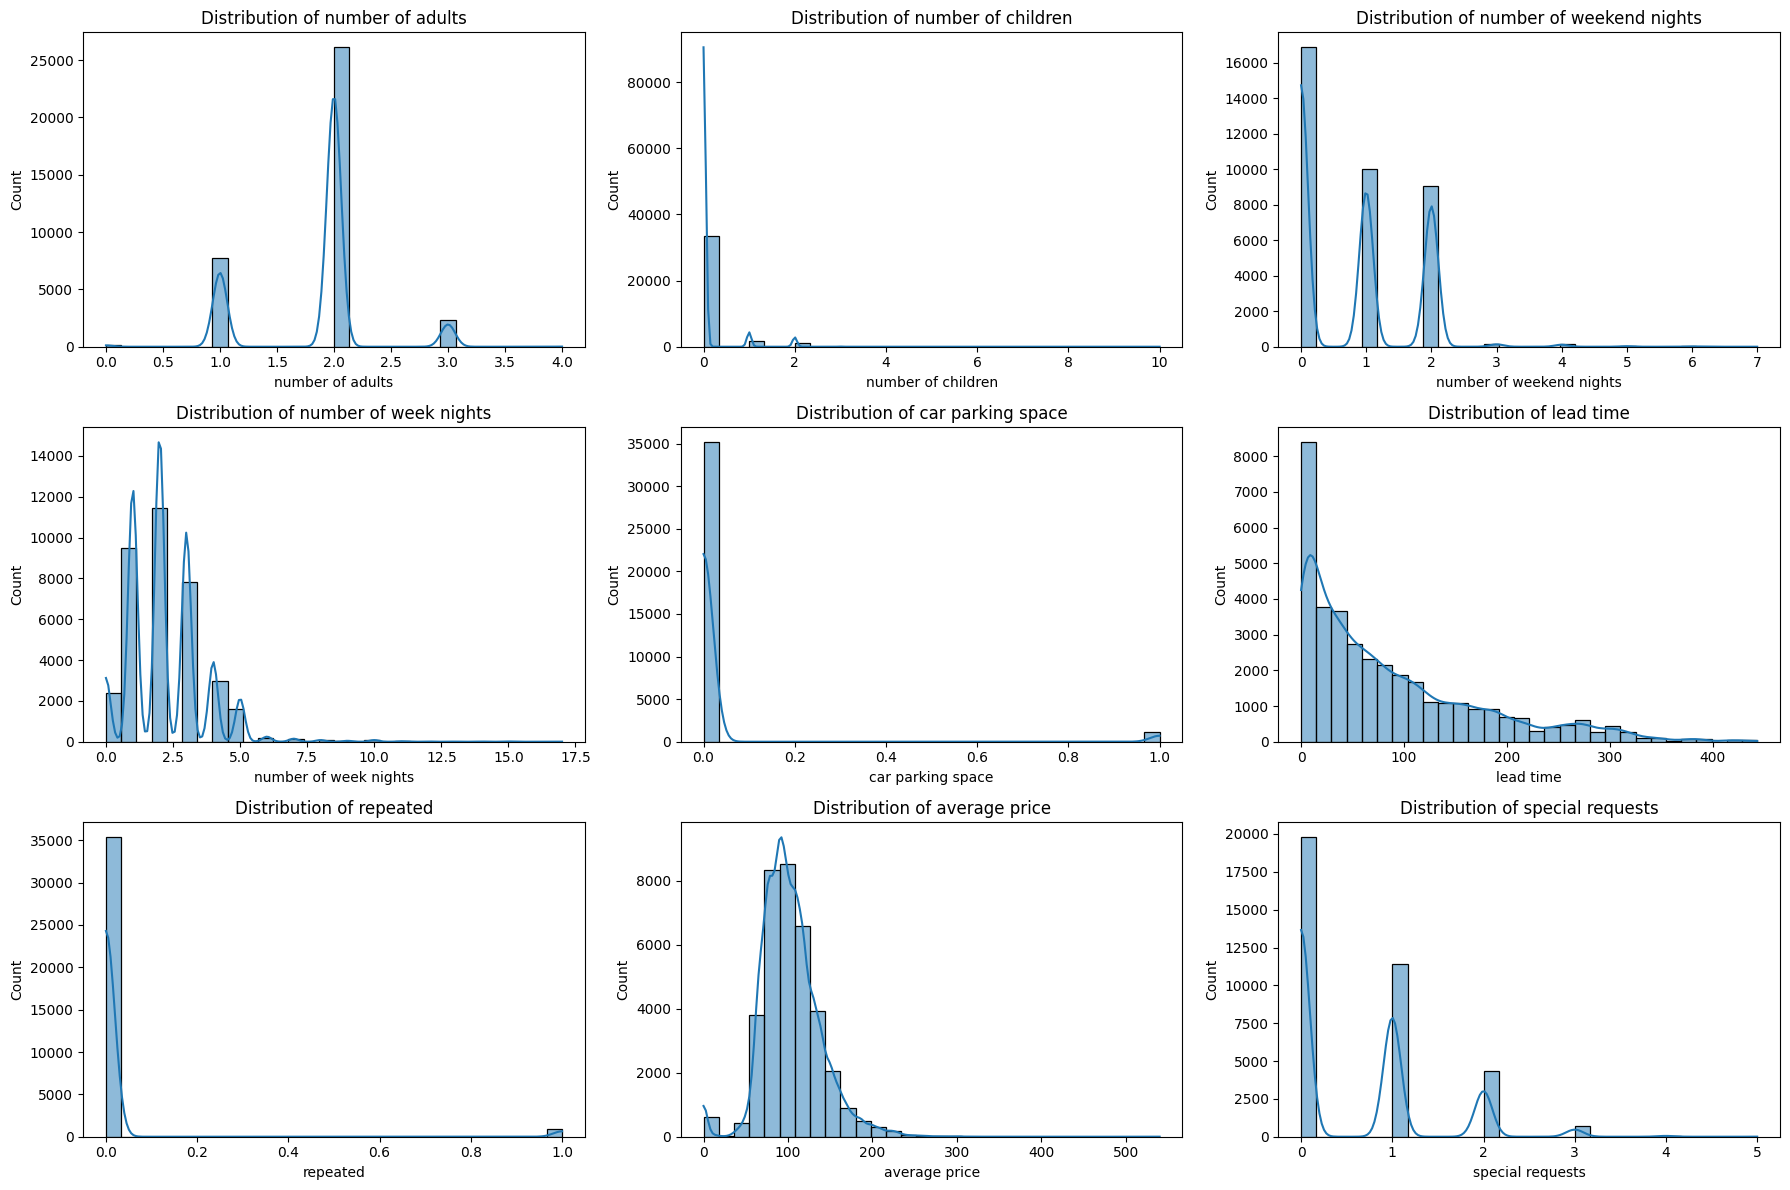

In [13]:
# Visualize numerical feature distributions
fig, axes = plt.subplots(len(num_cols)//3 , 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

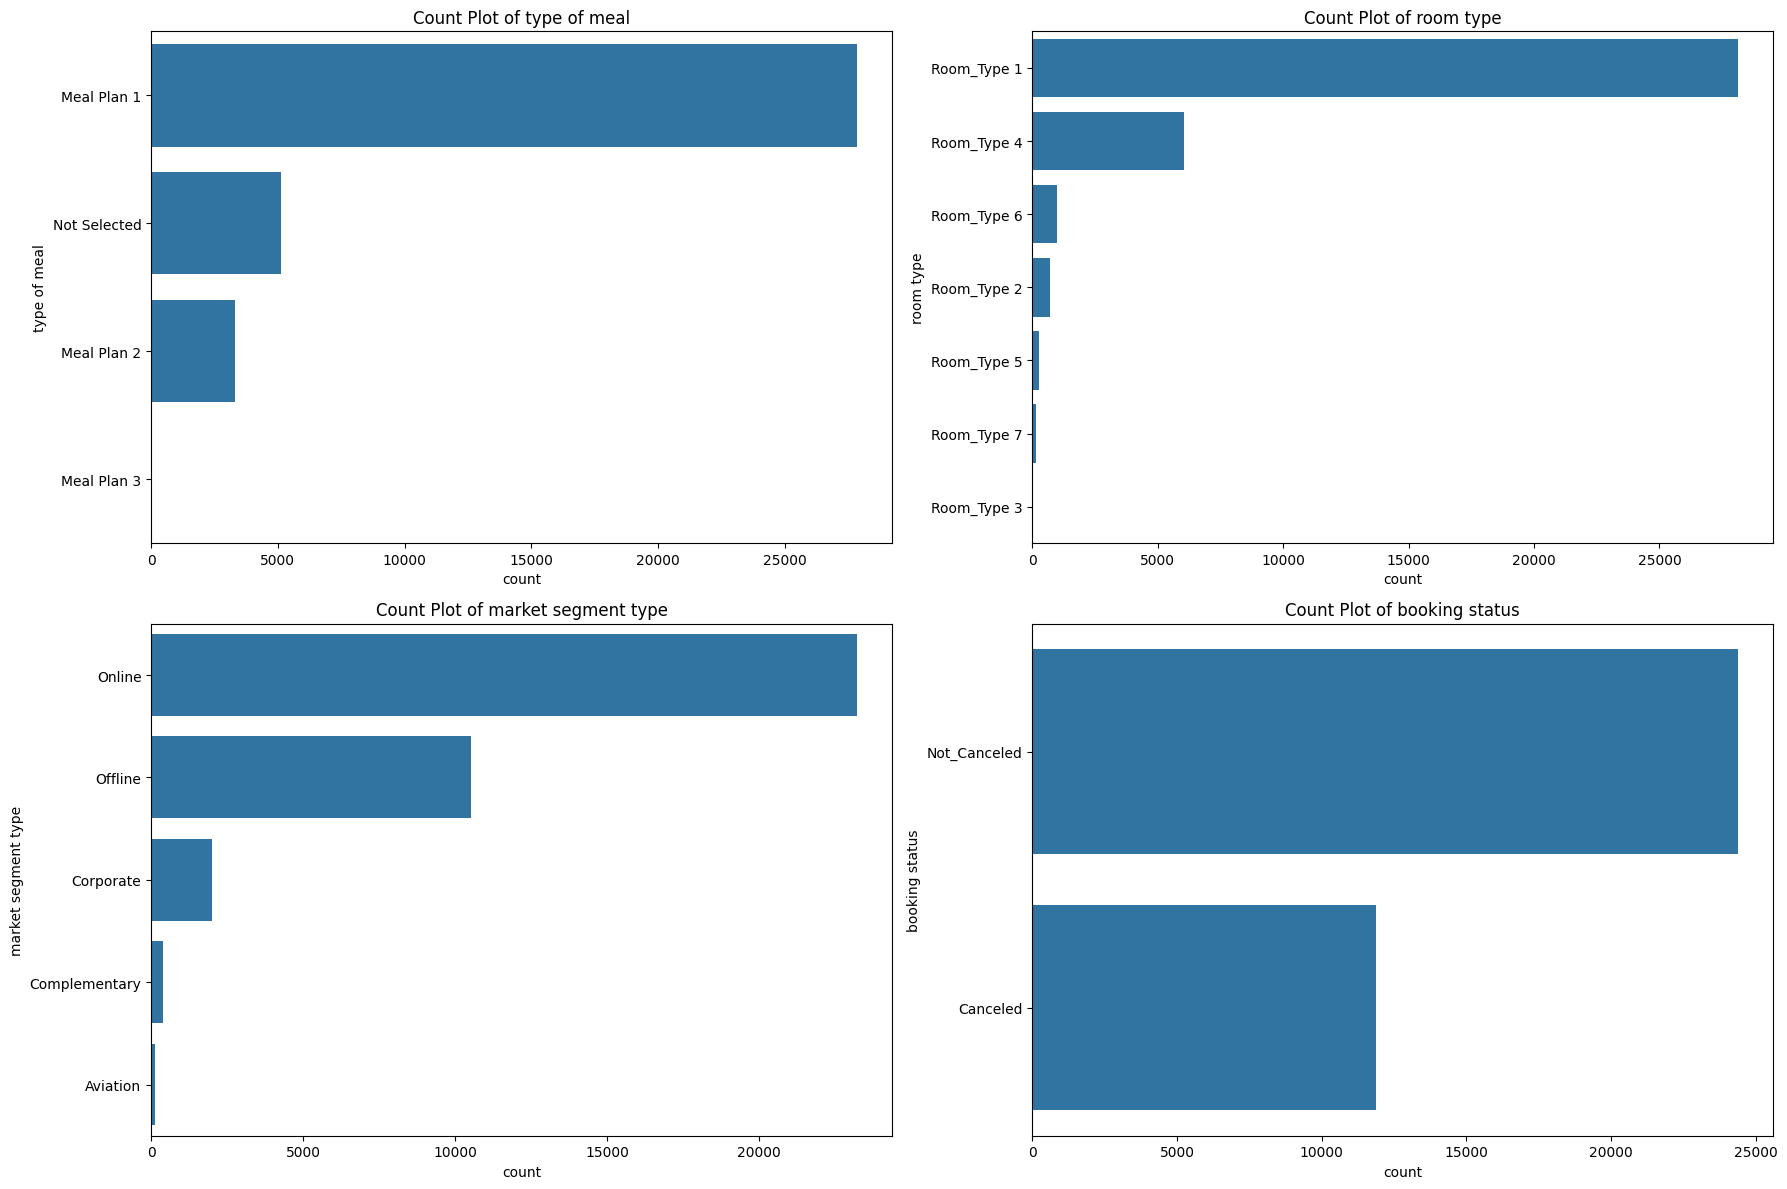

In [14]:
# Visualize categorical feature distributions
fig, axes = plt.subplots(len(cat_cols)//2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()

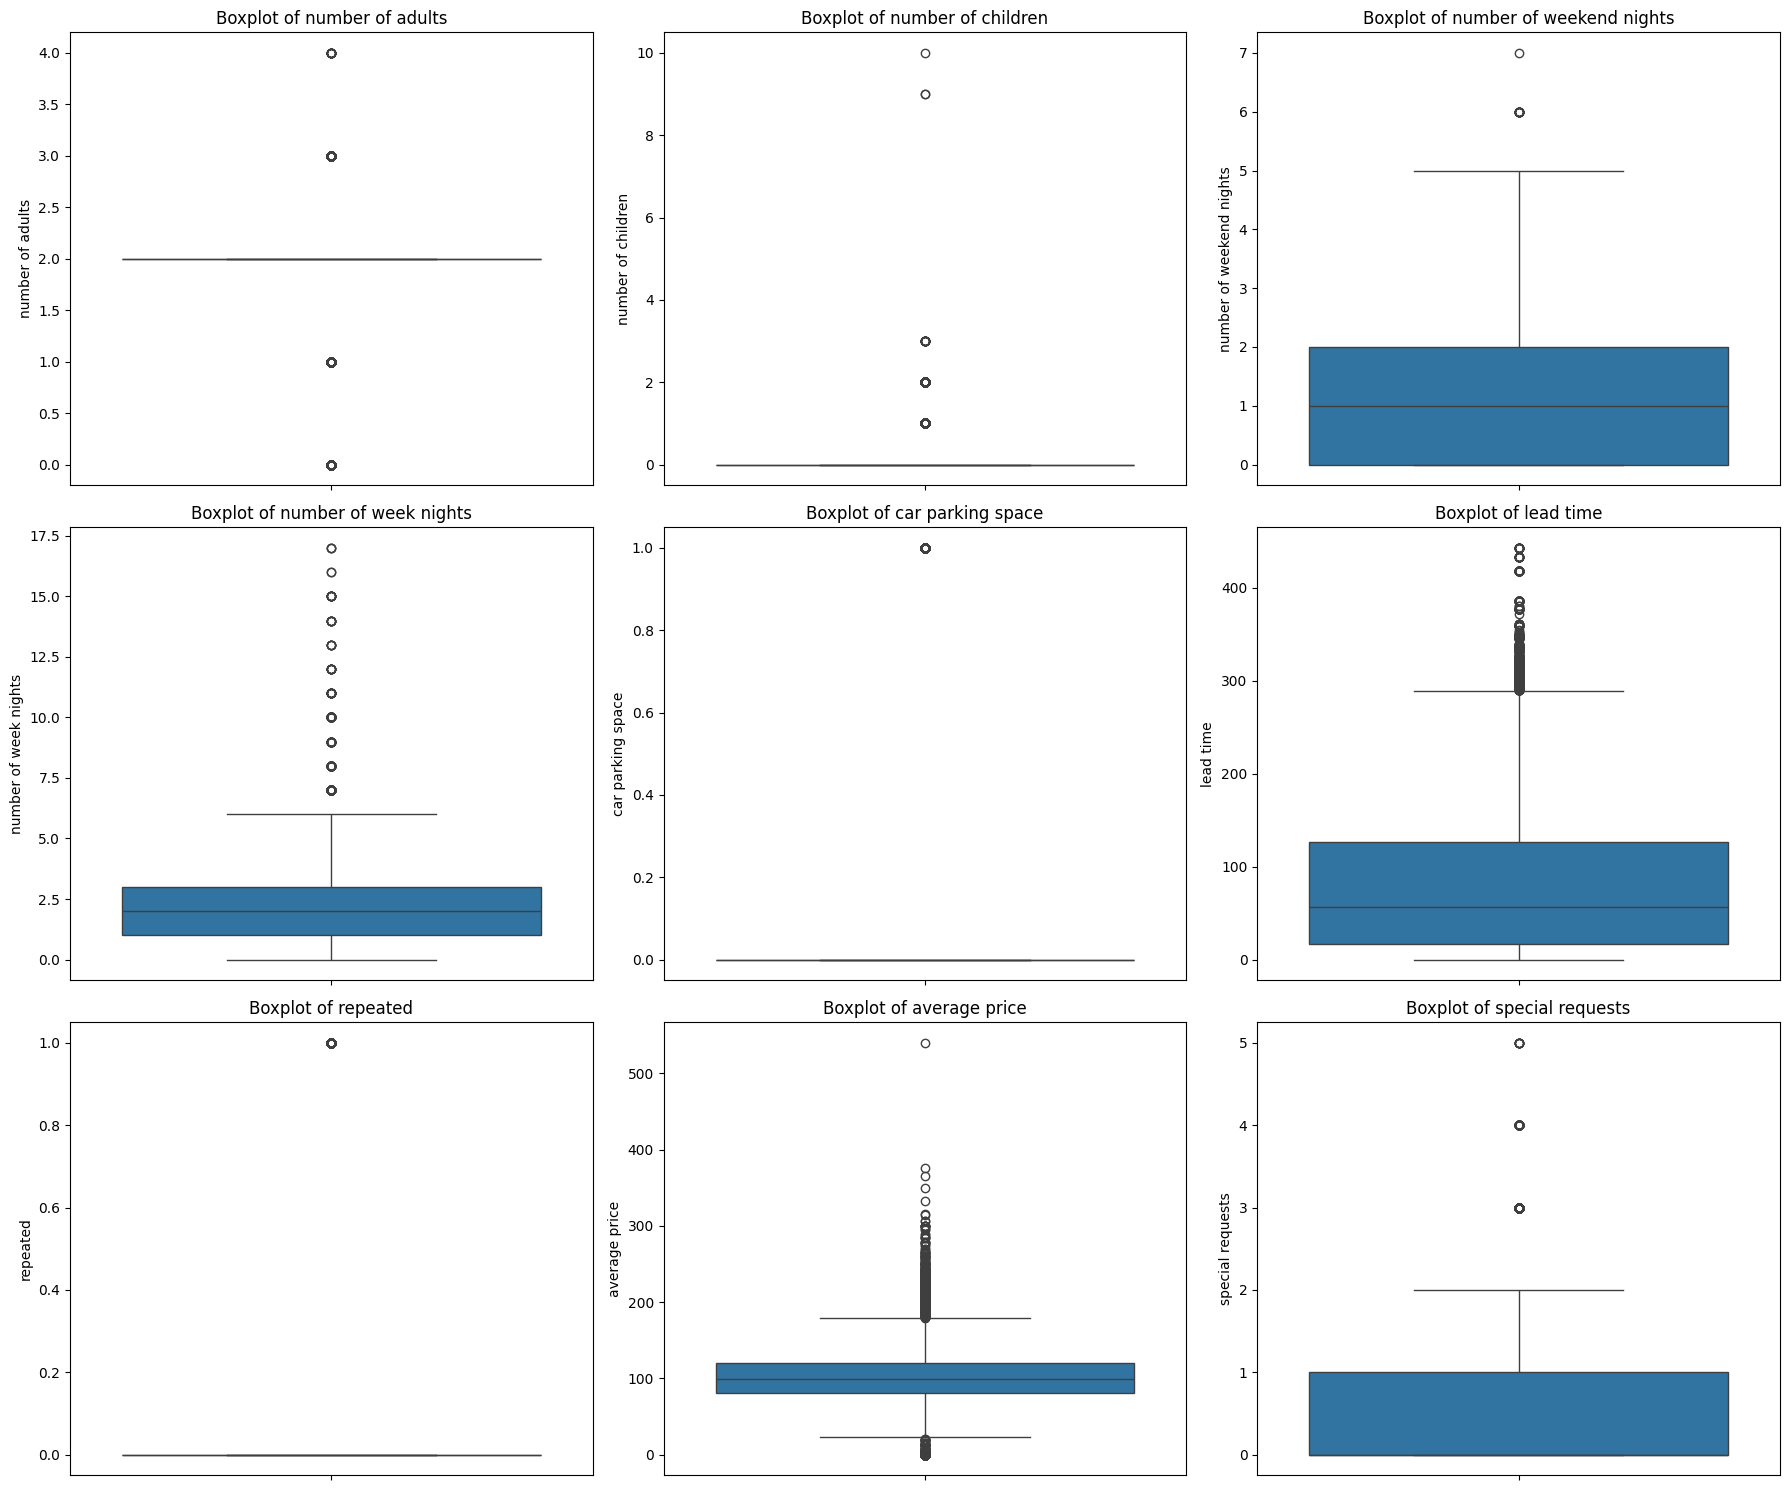

In [15]:
# Boxplots for outlier detection in numerical features
fig, axes = plt.subplots(len(num_cols)//2-1, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [12]:
# Handle outliers (capping at 1st and 99th percentile)
for col in ['lead time', 'average price', 'number of weekend nights', 'number of week nights']:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [13]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_cleaned

In [14]:
# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, num_cols)

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20976 entries, 12 to 36282
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          20976 non-null  int64         
 1   number of children        20976 non-null  int64         
 2   number of weekend nights  20976 non-null  int64         
 3   number of week nights     20976 non-null  int64         
 4   type of meal              20976 non-null  object        
 5   car parking space         20976 non-null  int64         
 6   room type                 20976 non-null  object        
 7   lead time                 20976 non-null  int64         
 8   market segment type       20976 non-null  object        
 9   repeated                  20976 non-null  int64         
 10  average price             20976 non-null  float64       
 11  special requests          20976 non-null  int64         
 12  date of reservation   

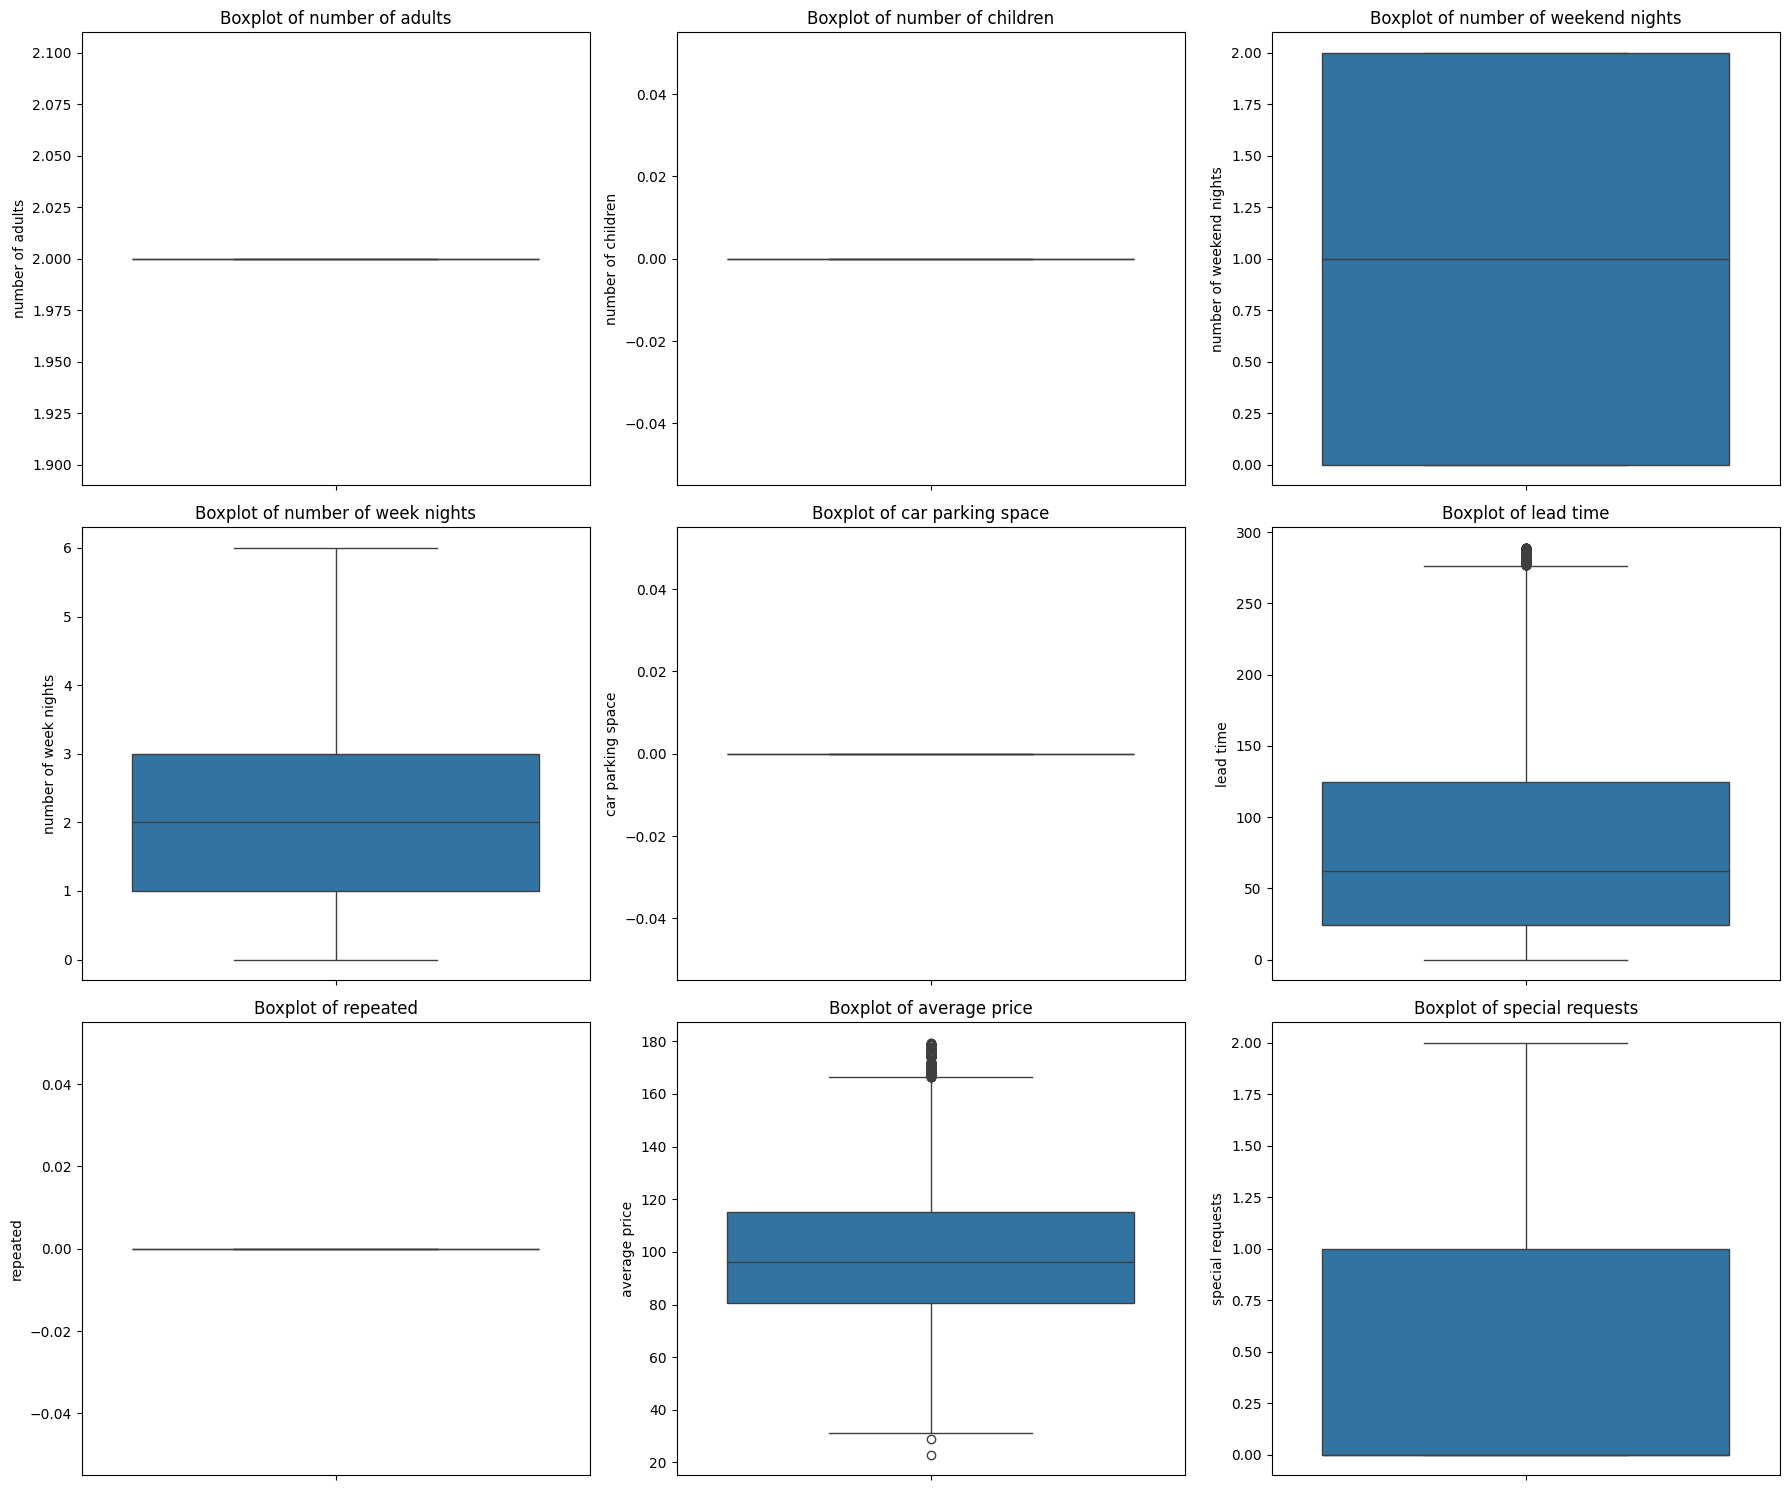

In [16]:
# Boxplots after removing outliers
fig, axes = plt.subplots(len(num_cols)//2-1, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df_cleaned, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [23]:
# after removing the outliers i have no average price with zero amount 
zero_price = df[df['average price'] == 0]
zero_price.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,date of reservation,booking status


# Visualise the Original data 

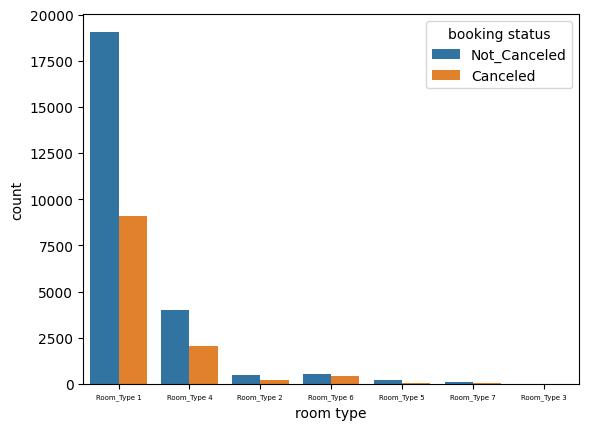

In [24]:
sns.countplot(data=df, x='room type', hue='booking status')
plt.xticks(size=5)
plt.show()

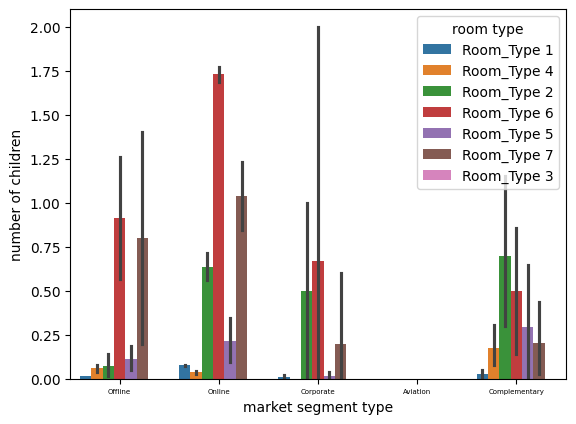

In [25]:
# Plot
sns.barplot(data=df, x='market segment type', y='number of children', hue='room type')
plt.xticks(size=5)
plt.show()

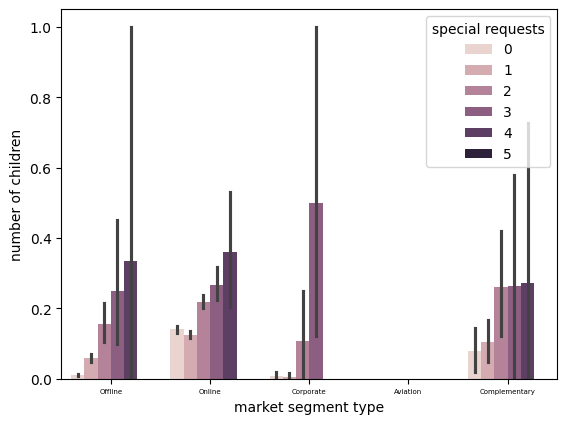

In [26]:
# Plot
sns.barplot(data=df, x='market segment type', y='number of children', hue='special requests')
plt.xticks(size=5)
plt.show()

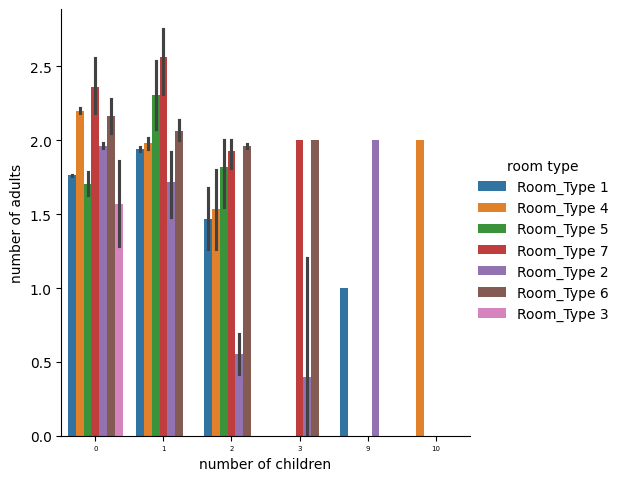

In [27]:
# Plot
sns.catplot(data=df, x='number of children', y='number of adults', hue='room type' ,kind='bar')
plt.xticks(size=5)
plt.show()

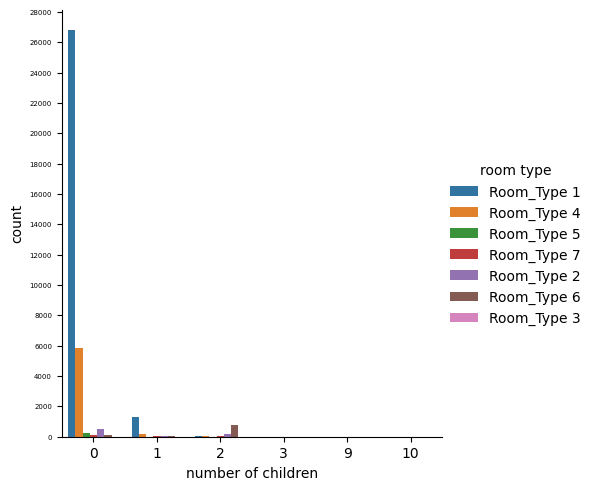

In [28]:
import numpy as np
# Plot
g = sns.catplot(data=df, x='number of children', hue='room type', kind='count')

# Modify y-axis ticks
ax = g.ax  # Get the matplotlib axis from the FacetGrid
y_max = ax.get_ylim()[1]  # Get the current max y-limit
ax.set_yticks(np.arange(0, y_max, 2000))  # Set ticks at intervals of 1000
ax.set_yticklabels([f"{int(tick)}" for tick in ax.get_yticks()], size=5)  # Adjust font size

plt.show()


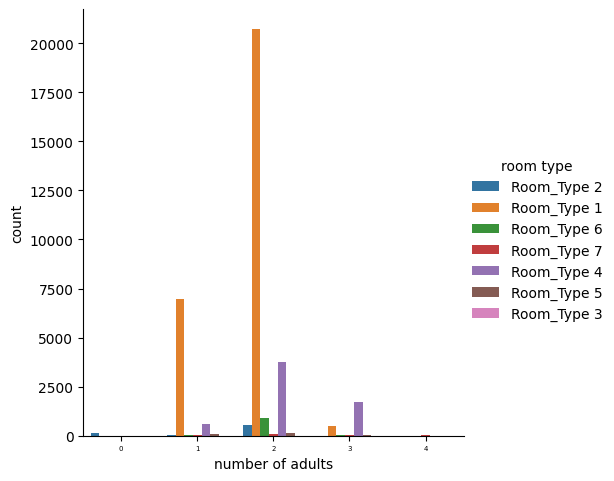

In [29]:
# Plot
sns.catplot(data=df, x='number of adults', hue='room type' ,kind='count')
plt.xticks(size=5)
plt.show()

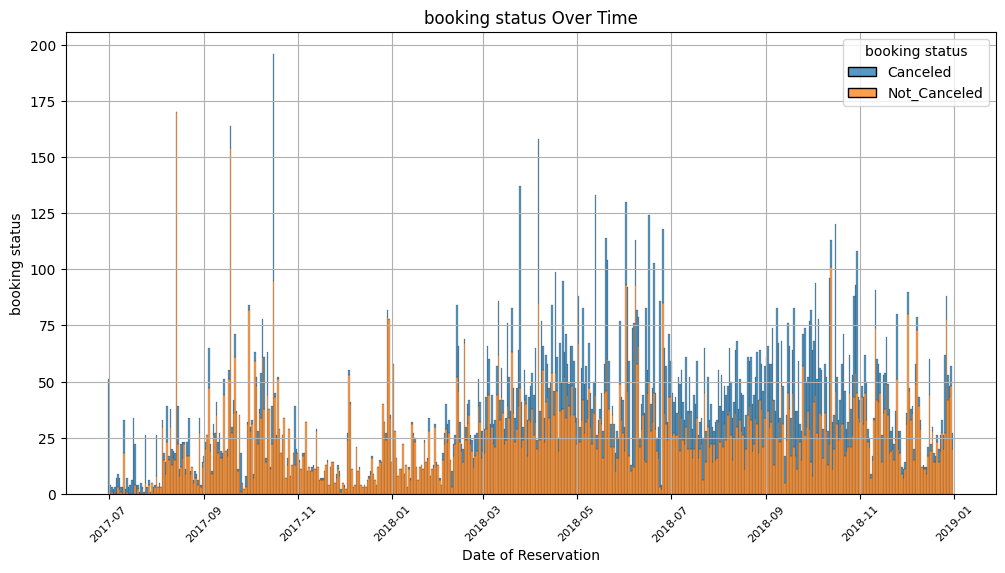

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='date of reservation', hue='booking status', multiple='stack', discrete=True)
plt.xticks(rotation=45, fontsize=8)
plt.title('booking status Over Time')
plt.xlabel('Date of Reservation')
plt.ylabel('booking status')
plt.grid(True, which='major')
plt.show()

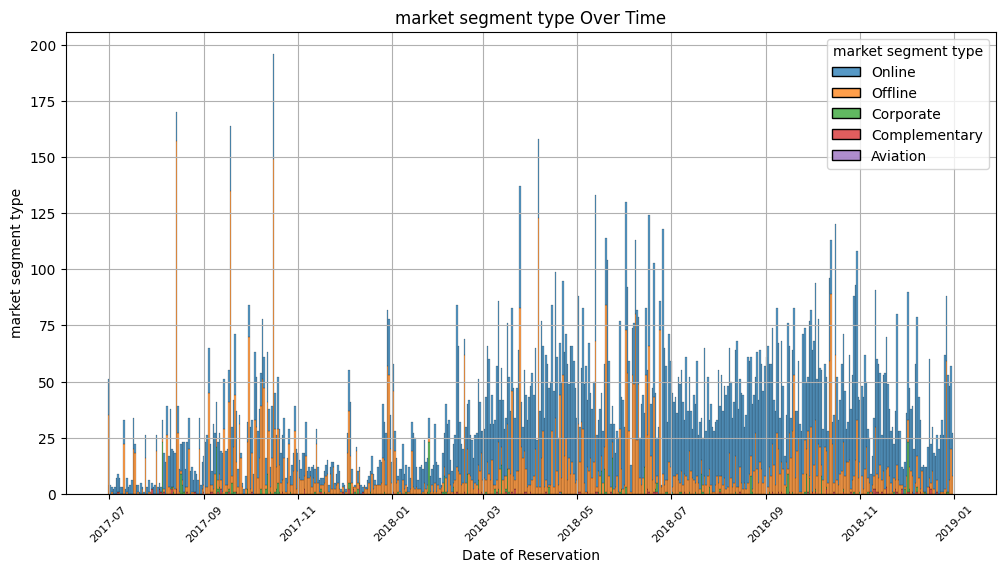

In [57]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='date of reservation', hue='market segment type', multiple='stack', discrete=True)
plt.xticks(rotation=45, fontsize=8)
plt.title('market segment type Over Time')
plt.xlabel('Date of Reservation')
plt.ylabel('market segment type')
plt.grid(True, which='major')
plt.show()

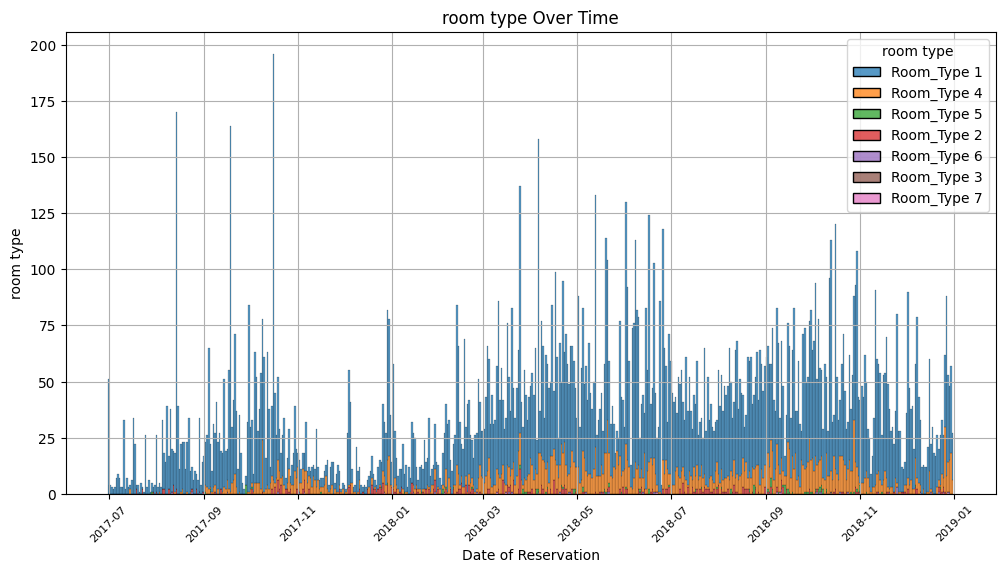

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='date of reservation', hue='room type', multiple='stack', discrete=True)
plt.xticks(rotation=45, fontsize=8)
plt.title('room type Over Time')
plt.xlabel('Date of Reservation')
plt.ylabel('room type')
plt.grid(True, which='major')
plt.show()

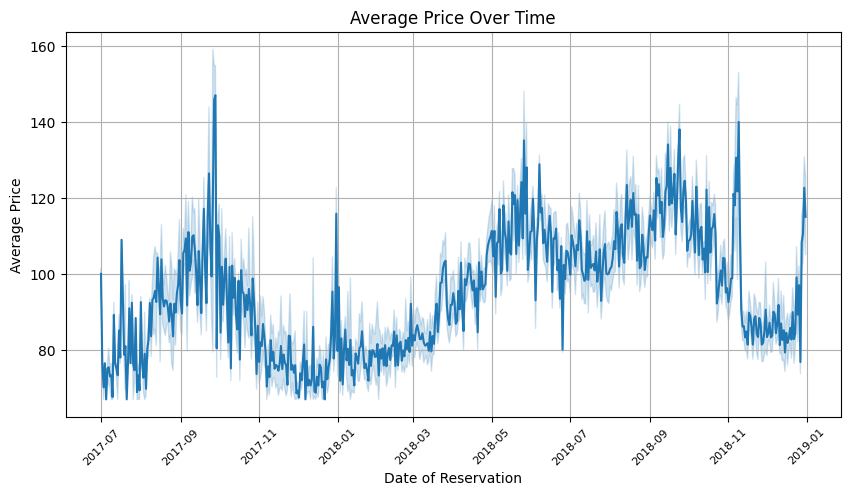

In [50]:
# Plot
plt.figure(figsize=(10, 5))  # Adjust figure size for better readability
sns.lineplot(data=df_cleaned, x='date of reservation', y='average price')
plt.xticks(rotation=45, fontsize=8)  # Rotate and adjust size of x-axis labels
plt.title('Average Price Over Time')  # Add title
plt.xlabel('Date of Reservation')  # Label x-axis
plt.ylabel('Average Price')  # Label y-axis
plt.grid(True)  # Add grid for better visualization
plt.show()

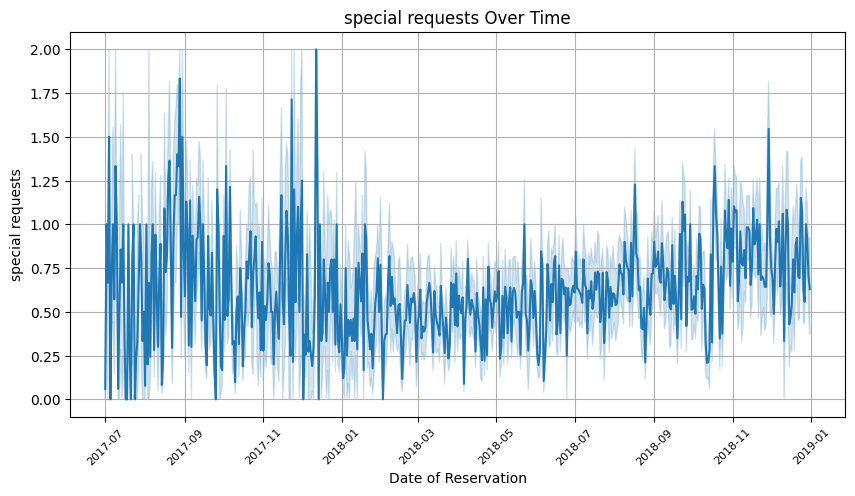

In [59]:
# Plot
plt.figure(figsize=(10, 5))  # Adjust figure size for better readability
sns.lineplot(data=df_cleaned, x='date of reservation', y='special requests')  # Corrected y-axis
plt.xticks(rotation=45, fontsize=8)  # Rotate and adjust size of x-axis labels
plt.title('special requests Over Time')  # Add title
plt.xlabel('Date of Reservation')  # Label x-axis
plt.ylabel('special requests')  # Label y-axis
plt.grid(True)  # Add grid for better visualization
plt.show()


# Corr visualise

In [30]:
df_cleaned.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated',
       'average price', 'special requests', 'date of reservation',
       'booking status'],
      dtype='object')

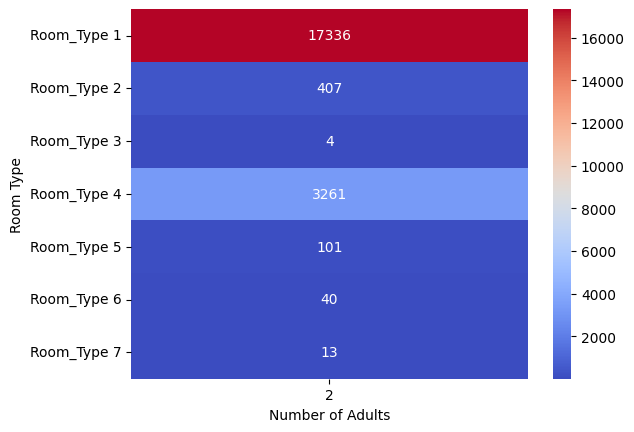

In [31]:
# Create a pivot table for counts
adults_table = pd.crosstab(index=df_cleaned['room type'], columns=df_cleaned['number of adults'])

# Plot
sns.heatmap(adults_table, annot=True, cmap='coolwarm', fmt='d')
plt.ylabel("Room Type")
plt.xlabel("Number of Adults")
plt.show()

In [32]:
adults_table

number of adults,2
room type,
Room_Type 1,17336
Room_Type 2,407
Room_Type 3,4
Room_Type 4,3261
Room_Type 5,101
Room_Type 6,40
Room_Type 7,13


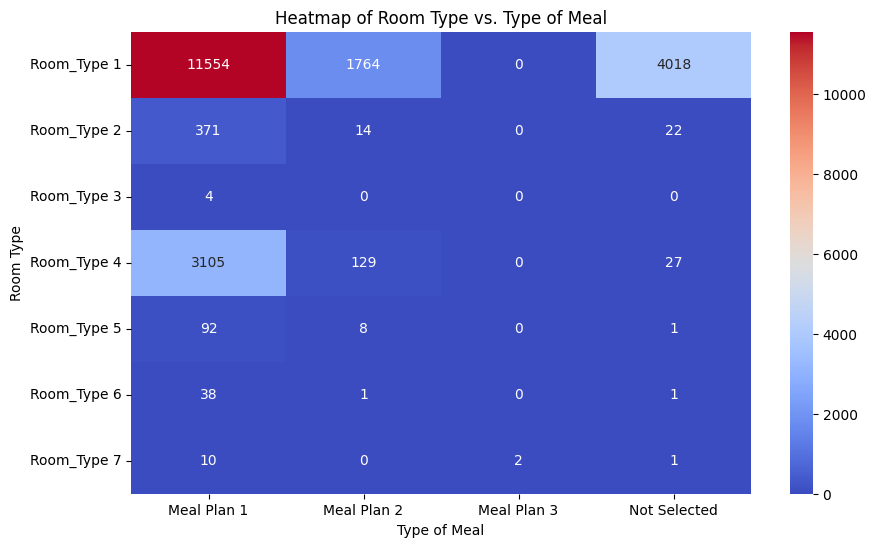

In [33]:
# Create a pivot table for counts
meal_table = pd.crosstab(index=df_cleaned['room type'], 
                             columns=[df_cleaned['type of meal']])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(meal_table, annot=True, cmap='coolwarm', fmt='d')

# Labels
plt.ylabel("Room Type")
plt.xlabel("Type of Meal")
plt.title("Heatmap of Room Type vs. Type of Meal")

plt.show()


In [34]:
meal_table

type of meal,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
room type,,,,
Room_Type 1,11554,1764,0,4018
Room_Type 2,371,14,0,22
Room_Type 3,4,0,0,0
Room_Type 4,3105,129,0,27
Room_Type 5,92,8,0,1
Room_Type 6,38,1,0,1
Room_Type 7,10,0,2,1


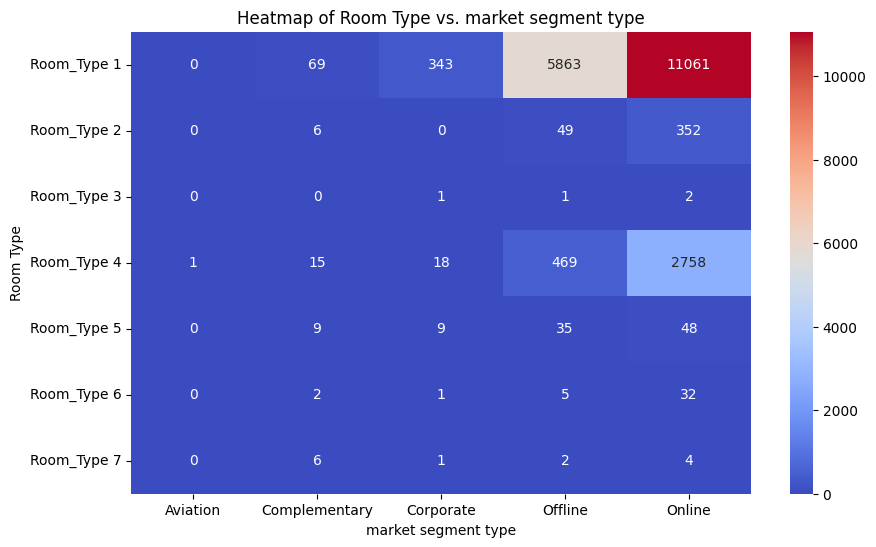

In [36]:
# Create a pivot table for counts
market_table = pd.crosstab(index=df_cleaned['room type'], 
                             columns=[df_cleaned['market segment type']])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(market_table, annot=True, cmap='coolwarm', fmt='d')

# Labels
plt.ylabel("Room Type")
plt.xlabel("market segment type")
plt.title("Heatmap of Room Type vs. market segment type")

plt.show()

In [37]:
market_table

market segment type,Aviation,Complementary,Corporate,Offline,Online
room type,,,,,
Room_Type 1,0,69,343,5863,11061
Room_Type 2,0,6,0,49,352
Room_Type 3,0,0,1,1,2
Room_Type 4,1,15,18,469,2758
Room_Type 5,0,9,9,35,48
Room_Type 6,0,2,1,5,32
Room_Type 7,0,6,1,2,4


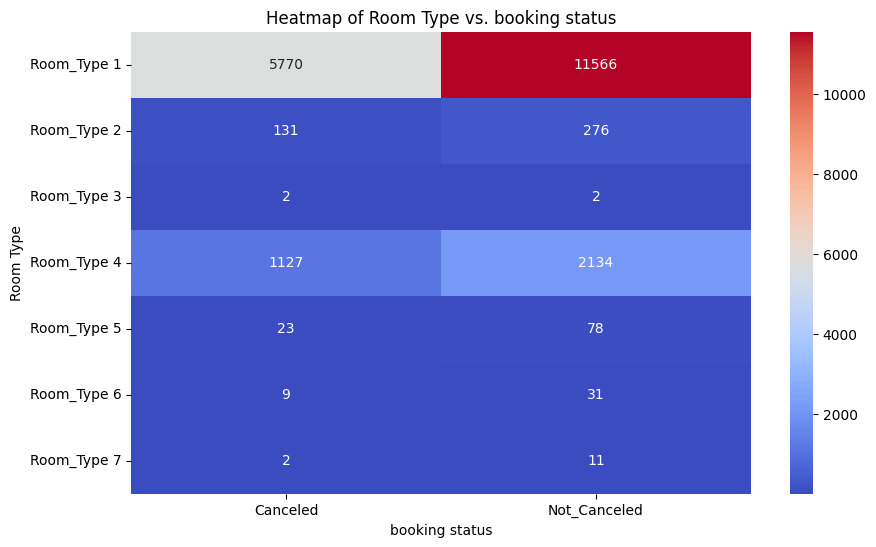

In [41]:
# Create a pivot table for counts
booking_status = pd.crosstab(index=df_cleaned['room type'], 
                             columns=[df_cleaned['booking status']])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(booking_status, annot=True, cmap='coolwarm', fmt='d')

# Labels
plt.ylabel("Room Type")
plt.xlabel("booking status")
plt.title("Heatmap of Room Type vs. booking status")

plt.show()

In [42]:
booking_status

booking status,Canceled,Not_Canceled
room type,,
Room_Type 1,5770,11566
Room_Type 2,131,276
Room_Type 3,2,2
Room_Type 4,1127,2134
Room_Type 5,23,78
Room_Type 6,9,31
Room_Type 7,2,11


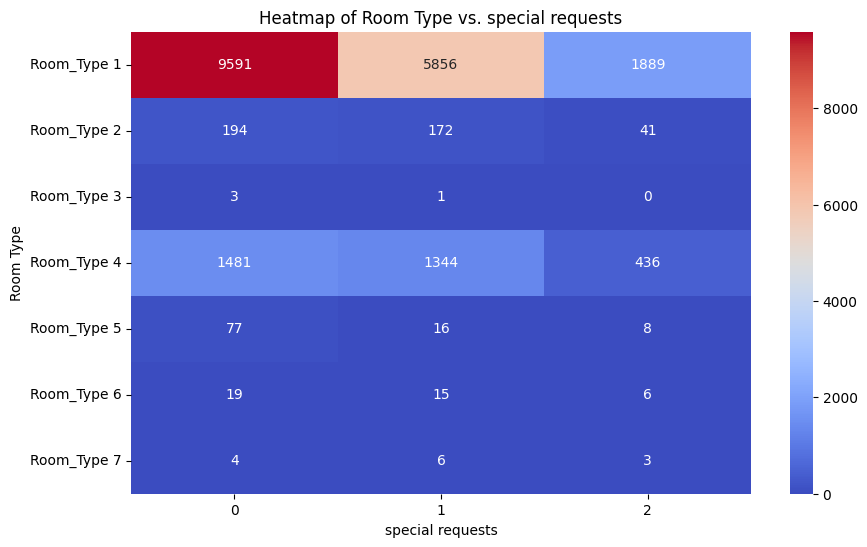

In [43]:
# Create a pivot table for counts
specia_request = pd.crosstab(index=df_cleaned['room type'], 
                             columns=[df_cleaned['special requests']])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(specia_request, annot=True, cmap='coolwarm', fmt='d')

# Labels
plt.ylabel("Room Type")
plt.xlabel("special requests")
plt.title("Heatmap of Room Type vs. special requests")

plt.show()

In [44]:
specia_request

special requests,0,1,2
room type,,,
Room_Type 1,9591,5856,1889
Room_Type 2,194,172,41
Room_Type 3,3,1,0
Room_Type 4,1481,1344,436
Room_Type 5,77,16,8
Room_Type 6,19,15,6
Room_Type 7,4,6,3


# ML

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier , GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report , mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [57]:
df_cleaned.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
12,2,0,2,1,2,0,0,30,4,0,88.0,0,0
14,2,0,0,2,0,0,0,47,4,0,94.5,2,1
15,2,0,0,2,1,0,0,256,4,0,115.0,1,0
17,2,0,1,3,2,0,0,1,4,0,96.0,1,1
18,2,0,2,2,0,0,0,99,4,0,65.0,0,0


In [19]:
# drop date col 
df_cleaned.drop(columns='date of reservation',inplace=True)

In [22]:
# Encode categorical variables
categorical_cols = ["type of meal", "room type", "market segment type", "booking status"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

In [23]:
# Check dataset after preprocessing
df_cleaned.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
12,2,0,2,1,2,0,0,30,4,0,88.0,0,0
14,2,0,0,2,0,0,0,47,4,0,94.5,2,1
15,2,0,0,2,1,0,0,256,4,0,115.0,1,0
17,2,0,1,3,2,0,0,1,4,0,96.0,1,1
18,2,0,2,2,0,0,0,99,4,0,65.0,0,0


In [46]:
# Separate features and targets
X = df_cleaned.drop(columns=["booking status", "average price"])
y_classification = df_cleaned["booking status"]
y_regression = df_cleaned["average price"]

In [47]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Apply PCA for feature selection (keeping components that explain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [49]:
# explore the shape befor and after
print(f"shape befor: {df_cleaned.shape} \nshape after: {X_pca.shape}")

shape befor: (20976, 13) 
shape after: (20976, 7)


In [84]:
# Correctly split classification and regression targets separately
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_pca, y_classification, test_size=0.2, random_state=42 )
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_pca, y_regression, test_size=0.2, random_state=42)

In [85]:
# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)
classification_accuracy = accuracy_score(y_test_cls, y_pred_cls)

In [86]:
# Train Gradient Boosting Regressor
reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)
regression_mae = mean_absolute_error(y_test_reg, y_pred_reg)


In [87]:
# Output results
classification_accuracy, regression_mae

(0.822926596758818, 16.216176795195583)

# Model Visualise 

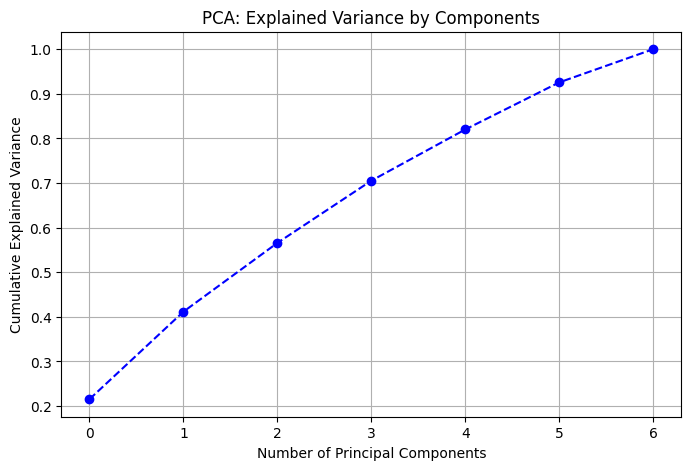

In [88]:
import numpy as np

# PCA Variance Explained Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance by Components')
plt.grid(True)
plt.show()

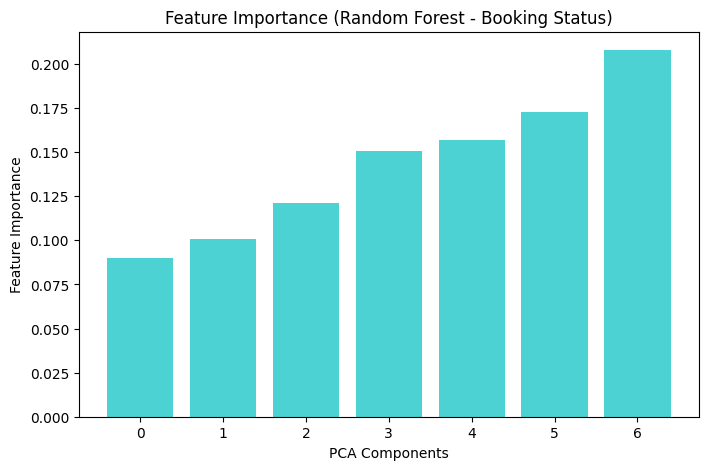

In [89]:
# Feature Importance for Classification (Random Forest)
importance_cls = clf.feature_importances_
importance_cls.sort()
plt.figure(figsize=(8, 5))
plt.bar(range(len(importance_cls)), importance_cls, color='c', alpha=0.7)
plt.xlabel('PCA Components')
plt.ylabel('Feature Importance')
plt.title('Feature Importance (Random Forest - Booking Status)')
plt.show()


In [103]:
# Get the top PCA components based on feature importance in classification
top_pca_indices_cls = np.argsort(clf.feature_importances_)[::-1][:10]  # Top 10 important components

# Get the corresponding original feature contributions to those PCA components
pca_components = pca.components_
original_feature_contributions_cls = np.abs(pca_components[top_pca_indices_cls])  # Absolute values for contribution strength

# Sum contributions across selected important components
feature_importance_original_cls = original_feature_contributions_cls.sum(axis=0)

# Map back to original feature names
feature_names = X.columns
importance_dict_cls = dict(zip(feature_names, feature_importance_original_cls))

# Sort by importance and display
sorted_importance_cls = sorted(importance_dict_cls.items(), key=lambda x: x[1], reverse=True)
sorted_importance_cls[:10]  # Show top 10 original features contributing to important PCA components for classification


[('room type', np.float64(2.4770195546692433)),
 ('number of week nights', np.float64(2.294681927825954)),
 ('type of meal', np.float64(2.276330370394432)),
 ('lead time', np.float64(2.223844717264053)),
 ('number of weekend nights', np.float64(2.0908316099008384)),
 ('special requests', np.float64(2.0557862570340495)),
 ('market segment type', np.float64(2.040382577938211)),
 ('car parking space', np.float64(4.996003610813204e-16)),
 ('number of adults', np.float64(0.0)),
 ('number of children', np.float64(0.0))]

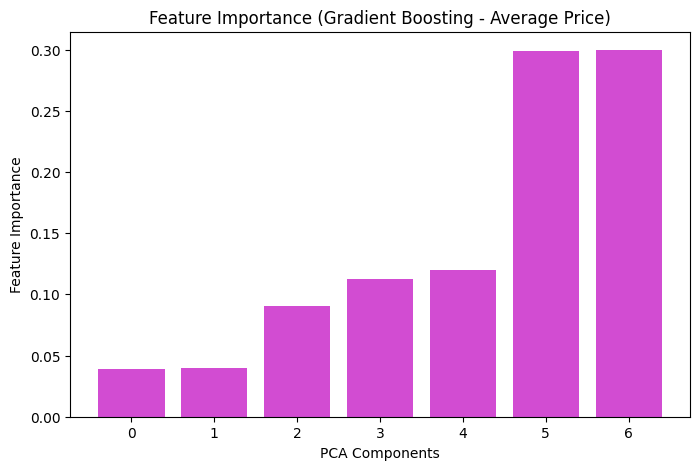

In [99]:
# Feature Importance for Regression (Gradient Boosting)
importance_reg = reg.feature_importances_
importance_reg.sort()
plt.figure(figsize=(8, 5))
plt.bar(range(len(importance_reg)), importance_reg, color='m', alpha=0.7)
plt.xlabel('PCA Components')
plt.ylabel('Feature Importance')
plt.title('Feature Importance (Gradient Boosting - Average Price)')
plt.show()

In [102]:
# Get the top PCA components based on feature importance in regression
top_pca_indices = np.argsort(reg.feature_importances_)[::-1][:10]  # Top 10 important components

# Get the corresponding original feature contributions to those PCA components
pca_components = pca.components_  # PCA loadings (mapping of original features to PCs)
original_feature_contributions = np.abs(pca_components[top_pca_indices])  # Absolute values for contribution strength

# Sum contributions across selected important components
feature_importance_original = original_feature_contributions.sum(axis=0)

# Map back to original feature names
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importance_original))

# Sort by importance and display
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_importance[:10]  # Show top 10 original features contributing to important PCA components


[('room type', np.float64(2.4770195546692437)),
 ('number of week nights', np.float64(2.2946819278259536)),
 ('type of meal', np.float64(2.276330370394432)),
 ('lead time', np.float64(2.2238447172640528)),
 ('number of weekend nights', np.float64(2.0908316099008384)),
 ('special requests', np.float64(2.0557862570340495)),
 ('market segment type', np.float64(2.040382577938211)),
 ('car parking space', np.float64(4.996003610813204e-16)),
 ('number of adults', np.float64(0.0)),
 ('number of children', np.float64(0.0))]